<a href="https://colab.research.google.com/github/sixth-group/project2/blob/main/cvision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading Train Dataset
using `!gdown` to download the data and then unzip it with `!unzip`

In [3]:
!gdown 1O4YR4UBatOLnaP4gMHbmFw7UJvhhxFwq
!unzip train_data.zip
%rm train_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_data/10/fac187c69fc74a48d28e626bd17fe5b0d36db1e6_1618836534.jpg  
  inflating: train_data/10/9a9f9ff4d3dcfc88e6b9209178d4ee791142fdaa_1618725283.jpg  
  inflating: train_data/10/958281d27ab722113c92180afe17db62bfb6a5d0_1623743398.jpg  
  inflating: train_data/10/8a94fada61bcb6dda8983dc36ddf2ec5d32cbf9f_1629199040.jpg  
  inflating: train_data/10/d72c1b799a927514b1fd81d9ee93208734be4d61_1613975034.jpg  
  inflating: train_data/10/6550a6492a93a9542b7757c898369f7996bb62b7_1613978514.jpg  
  inflating: train_data/10/3465c07dc8a3521f0303cec03ebbc4ac2d738317_1630174913.jpg  
  inflating: train_data/10/74a657eb2f8bc1a9bcd42fee32d04b1a400fcddf_1627746721.jpg  
  inflating: train_data/10/387c4a5ef5d37c263ebe457a2aab08890da843ca_1620800188.jpg  
  inflating: train_data/10/01330eb299562e0e10bdc560e7ed12754f49703b_1621081068.jpg  
  inflating: train_data/10/1ea75672aea3496a099cc3c8d8e2c01306456a52_1619644153.jpg  
  inflating: t

In [4]:
# rm -rf train_data/

## Data Augmentation

In [5]:
import torch
import numpy as np
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import v2

In [6]:
# Define the transformations to be applied to the images
transform = v2.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [7]:
# Load the training dataset
train_dataset = datasets.ImageFolder('/content/train_data', transform=transform)
train_dataset

Dataset ImageFolder
    Number of datapoints: 9990
    Root location: /content/train_data
    StandardTransform
Transform: Compose(
                 Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                 ToTensor()
                 Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [8]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

In [9]:
# Define the data loaders for training and validation
batch_size = 512
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [10]:
import matplotlib.pyplot as plt

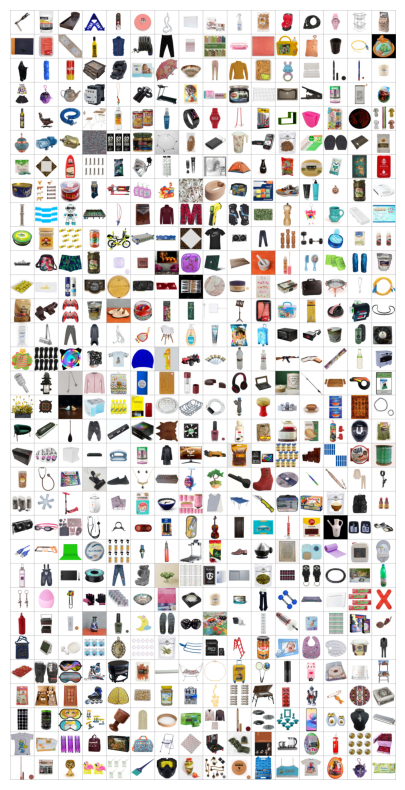

tensor([5, 5, 2, 5, 3, 0, 8, 5, 4, 2, 9, 7, 6, 8, 2, 9])
tensor([3, 9, 3, 9, 8, 6, 8, 3, 7, 7, 0, 7, 1, 3, 0, 2])
tensor([8, 5, 9, 2, 7, 7, 6, 1, 8, 8, 9, 7, 5, 4, 4, 1])
tensor([8, 7, 2, 5, 0, 6, 6, 6, 4, 9, 6, 2, 0, 5, 0, 9])
tensor([9, 2, 5, 2, 1, 9, 4, 0, 8, 6, 3, 3, 2, 7, 3, 3])
tensor([3, 5, 5, 3, 9, 9, 8, 9, 0, 2, 6, 1, 4, 4, 4, 1])
tensor([4, 1, 2, 5, 4, 0, 0, 4, 3, 6, 1, 9, 9, 7, 3, 4])
tensor([9, 7, 0, 8, 5, 4, 7, 3, 4, 0, 6, 8, 4, 1, 9, 2])
tensor([0, 5, 7, 6, 3, 3, 8, 9, 5, 5, 0, 2, 7, 1, 0, 7])
tensor([6, 9, 9, 9, 6, 5, 0, 1, 8, 0, 8, 2, 6, 4, 9, 2])
tensor([0, 8, 8, 9, 4, 1, 2, 7, 0, 1, 1, 4, 7, 3, 6, 9])
tensor([9, 4, 4, 3, 3, 0, 9, 1, 3, 4, 4, 9, 8, 1, 8, 0])
tensor([7, 5, 0, 9, 1, 2, 9, 9, 0, 3, 9, 7, 2, 2, 5, 5])
tensor([4, 5, 8, 8, 8, 7, 7, 9, 4, 9, 7, 2, 5, 5, 2, 0])
tensor([7, 5, 0, 0, 8, 6, 7, 7, 5, 1, 4, 7, 1, 2, 9, 2])
tensor([5, 5, 8, 8, 7, 0, 1, 6, 9, 0, 0, 1, 5, 2, 6, 3])
tensor([9, 2, 1, 4, 9, 0, 5, 2, 6, 5, 3, 5, 1, 4, 1, 8])
tensor([2, 3, 3, 8, 0, 0, 3, 0,

In [11]:
# Function to unnormalize and display an image
def imshow(image):
    image = image / 2 + 0.5  # Unnormalize the image
    np_image = image.numpy()
    plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(np_image, (1, 2, 0)))
    plt.axis('off')
    plt.show()

images, labels = next(iter(train_loader))

imshow(torchvision.utils.make_grid(images, nrow=16))

# Print the corresponding labels
c=0
for i in range(batch_size//16):
  print(labels[c:c+16])
  c+=16

In [12]:
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

In [13]:
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
for param in model.parameters():
    param.requires_grad = False

In [15]:
# iter = 0
# for name, child in model.named_children():
#   for gname, grandchild in child.named_children():
#     iter+=1
#     if iter >= 158 :
#       for param in child.parameters():
#         param.requires_grad = True

In [16]:
# for name, child in model.named_children():
#     if name == 'layer4' or name == 'fc':
#         for param in child.parameters():
#             param.requires_grad = True

In [17]:
# counter = 0
# for name, child in model.named_children():
#   print("---", name)
#   for gname, grandchild in child.named_children():
#     print(gname)
#     counter+=1

In [18]:
# for name, child in model.named_children():
#     print(name)

In [19]:
it = 0
for name, child in model.named_children():
      for param in child.parameters():
        it+=1
        if it >= 158 :
          param.requires_grad = True

In [20]:
counter = 0
for name, child in model.named_children():
      for param in child.parameters():
          print(name, param.requires_grad)
          counter+=1
print(counter)

conv1 False
bn1 False
bn1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer1 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer2 False
layer3 False
layer3 False
layer3 False
layer3 False
layer3 False
layer3

In [21]:
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 2

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

print("Finished Training")


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy}%")

## Downloading Test Dataset
using `!gdown` to download the data and then unzip it with `!unzip`

In [ ]:
!gdown 1-7aMdKW4KcCKLwoUKC3XxdIwfIKkzwx6
!unzip test_data.zip
%rm test_data.zip

In [ ]:
# rm -rf test_data/